## Lecture 11, In-Class Illustration: Solving an Initial Value Problem Numerically

### A first example of an ordinary differential equation

Ordinary differential equations are equations that describe the relationships between the derivatives of a function $f$. In this exercise, we'll give an example of an ordinary differential equation and illustrate how we can solve this equation numerically.

In [71]:
# as usual, run this cell to import some useful functions
from numpy import arange, exp
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
from time import sleep

print('You have imported some useful functions.')

You have imported some useful functions.


Now we can set up our problem.  Let us imagine, as in example 11.1, that we have a fossilized animal bone that contains some radioactive carbon.  This $^{14}$C decays to $^{12}$C with a half life of 5730 years, or a decay constant of 0.000121 years$^{1}$.  In other words, if the current concentration of $^{14}$C is $y$, then $^{14}$C is being broken down at a rate of $(0.000121) \times y$, and the rate of change of $^{14}$C in the sample is

$$\frac{dy}{dt}(t) = (-0.000121) y(t) $$


<br>

Say we begin at time $t=0$ with a concentration of $^{14}$C of $10^{-12}$.
What will the concentration of $^{14}$C be 10,000 years later?

<br>

The question above is an example of an initial value problem.  We know how much of a substance we start with, we know how quickly we lose that substance, and we want to keep track of how the amount of the substance evolves.

<br>
Q1: We start with a $^{14}$C concentration $y(0)=10^{-12}$.   How quickly is the concentration increasing or decreasing at time $t=0$?  What will  the concentration be after 100 years?

<br><br>

The concentration is decreasing.  From the $dy/dt$ equation above, we have

$$\frac{dy}{dt}(0) = (-0.000121) y(0)  = -1.21 \times 10^{-4} \times 10^{-12} 
= -1.21 \times 10^{-16} \textrm{ year}^{-1}$$

After 100 years, the concentration will be

$$y(100) \approx y(0) + \frac{dy}{dt}(0) \times 100 \textrm{ years} = 10^{-12} - 1.21 \times 10^{-16} \times 100$$


<br>
Using a computer makes this computation easier.  Try running the code below.

In [48]:
# let's imagine we start at the initial concentration
# note the initial concentration y: what we start with at time t=0
y0 = 10**(-12)

# note the initial time
t0 = 0.

print('The concentration y at time {:0.0f} is {:0.2e}'.format(t0,y0))
print('\n')

# compute the rate of change of the concentration dydt
dydt0 = -0.000121 * y0

print('The concentration is changing at a rate of dydt = -0.000121 * y = -0.000121 * {:0.2e}'.format(y0))
print('= {:0.2e} per year'.format(dydt0))

print('\n')

# and compute the new concentration at time t=100 years
y100 = y0 + dydt0 * 100

# and note the new time
t100 = t0 + 100

print('The concentration at time {:0.0f} is y(0) + dydt * 100 = {:0.2e} + {:0.2e} * 100'.format(t100,y0,dydt0))
print('= {:0.2e}'.format(y100))

The concentration y at time 0 is 1.00e-12


The concentration is changing at a rate of dydt = -0.000121 * y = -0.000121 * 1.00e-12
= -1.21e-16 per year


The concentration at time 100 is y(0) + dydt * 100 = 1.00e-12 + -1.21e-16 * 100
= 9.88e-13


Let's go ahead and plot the evolving concentration.

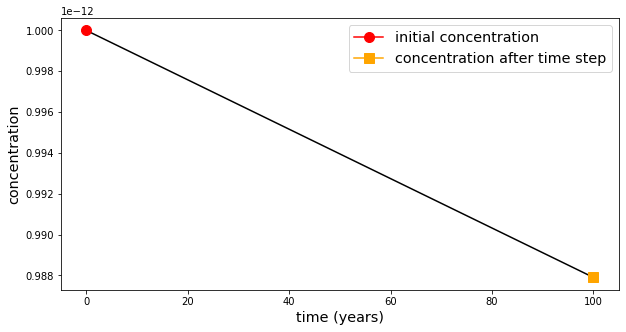

In [49]:
plt.figure(figsize=(10,5))

# plot both concentrations with a line
plot([t0,t100],[y0,y100],color='black',marker='o')

# plot the initial concentration
hinit,=plot(t0,y0,marker='o',color='red',label='initial concentration',markersize=10) 

# and the new concentration
hnew,=plot(t100,y100,marker='s',color='orange',label='concentration after time step',markersize=10) 


plt.xlabel('time (years)',fontsize='x-large');
plt.ylabel('concentration',fontsize='x-large');

plt.legend(fontsize='x-large');

That's fine for the first 100 years, but how about the next hundred years?  Maybe we can just do the same thing?

Q2: The $^{14}$C concentration at time $t=100$ years is $9.88 \times 10^{-13}$. What is the concentration at time $t=200$ years?

<br><br><br>

In [50]:
# to figure out the concentration at time t=200 years, we start at time t=100
print('The concentration y at time {:0.0f} is {:0.2e}'.format(t100,y100))
print('\n')

# compute the rate of change of the concentration at time t=100
dydt100 = -0.000121 * y100

print('The concentration is changing at a rate of dydt = -0.000121 * y = -0.000121 * {:0.2e}'.format(y0))
print('= {:0.2e} per year'.format(dydt100))

print('\n')

# and subtract to compute the concentration at time t=200 years
y200 = y100 + dydt100 * 100

# and note the new time
t200 = t100 + 100

print('The concentration at time {:0.0f} is y(0) + dydt * 100 = {:0.2e} + {:0.2e} * 100'.format(t200,y100,dydt100))
print('= {:0.2e}'.format(y200))

The concentration y at time 100 is 9.88e-13


The concentration is changing at a rate of dydt = -0.000121 * y = -0.000121 * 1.00e-12
= -1.20e-16 per year


The concentration at time 200 is y(0) + dydt * 100 = 9.88e-13 + -1.20e-16 * 100
= 9.76e-13


Let's go ahead and add these new calculations to our plot.

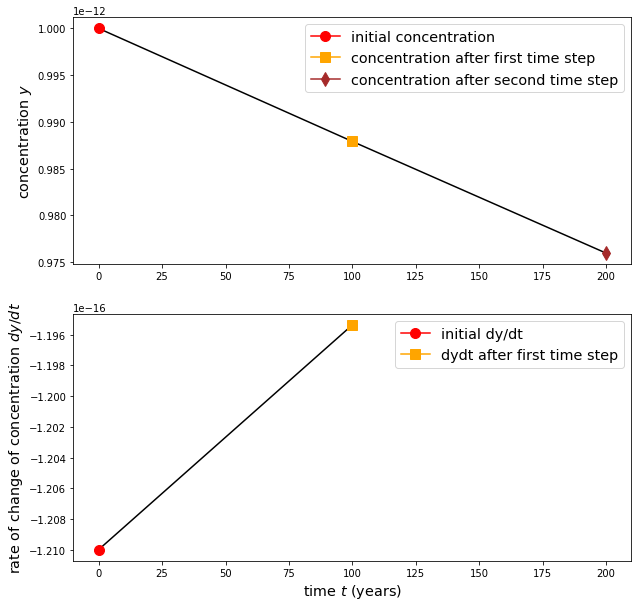

In [53]:
f,p=plt.subplots(2,figsize=(10,10))

# plot both concentrations with a line
p[0].plot([t0,t100,t200],[y0,y100,y200],color='black',marker='o')

# plot the initial concentration
h0,=p[0].plot(t0,y0,marker='o',color='red',label='initial concentration',markersize=10) 

# and the concentration after 100 years
h100,=p[0].plot(t100,y100,marker='s',color='orange',label='concentration after first time step',markersize=10) 

# and the concentration after 100 years
h200,=p[0].plot(t200,y200,marker='d',color='brown',label='concentration after second time step',markersize=10) 



# let's also plot dydt, the rate of change of concentration
# plot both dydt with a line
p[1].plot([t0,t100],[dydt0,dydt100],color='black',marker='o')

# plot the initial concentration
hh0,=p[1].plot(t0,dydt0,marker='o',color='red',label='initial dy/dt',markersize=10) 

# and the concentration after 100 years
hh100,=p[1].plot(t100,dydt100,marker='s',color='orange',label='dydt after first time step',markersize=10) 


p[1].set_xlabel('time $t$ (years)',fontsize='x-large');
p[0].set_ylabel('concentration $y$',fontsize='x-large');
p[1].set_ylabel('rate of change of concentration $dy/dt$',fontsize='x-large')
p[0].set_xlim([-10,210])
p[1].set_xlim([-10,210])
p[0].legend(fontsize='x-large');
p[1].legend(fontsize='x-large');

In the second plot above, we have plotted $\frac{dy}{dt}$.  Note that the amplitude of $\frac{dy}{dt}$ is getting smaller.  The amount of $^{14}$C is decreasing less quickly after 100 years because there is less $^{14}$C around to be lost.

Why don't we go ahead and keep going for a few more time steps?

In [56]:
# to get from t=200 to t=300

# concentration change rate  at t=200
dydt200 = -0.000121 * y200
# and the concentration at t=300
y300 = y200 + dydt200 * 100
# note the time
t300=t200+100

print('The concentration at t=300 is {:0.2e}'.format(y300))


# to get from t=300 to t=400

# concentration change rate  at t=200
dydt300 = -0.000121 * y300
# and the concentration at t=300
y400 = y300 + dydt300 * 100
# note the time
t400=t300+100

print('The concentration at t=400 is {:0.2e}'.format(y400))



# to get from t=400 to t=500

# concentration change rate  at t=400
dydt400 = -0.000121 * y400
# and the concentration at t=300
y500 = y400 + dydt400 * 100
# note the time
t500=t400+100

print('The concentration at t=500 is {:0.2e}'.format(y500))



# to get from t=500 to t=600

# concentration change rate  at t=500
dydt500 = -0.000121 * y500
# and the concentration at t=300
y600 = y500 + dydt500 * 100
# note the time
t600=t500+100

print('The concentration at t=600 is {:0.2e}'.format(y600))

The concentration at t=300 is 9.64e-13
The concentration at t=400 is 9.52e-13
The concentration at t=500 is 9.41e-13
The concentration at t=600 is 9.30e-13


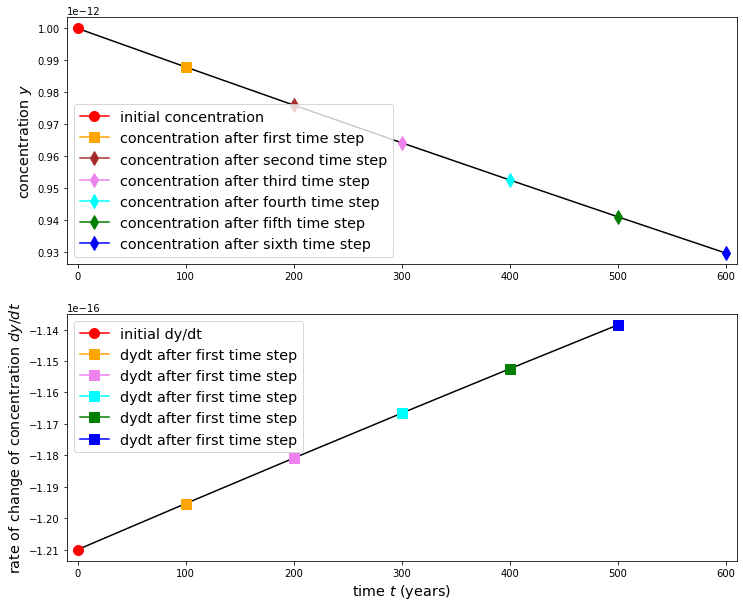

In [61]:
f,p=plt.subplots(2,figsize=(12,10))

# plot both concentrations with a line
p[0].plot([t0,t100,t200,t300,t400,t500,t600],
          [y0,y100,y200,y300,y400,y500,y600],color='black',marker='o')

# plot the initial concentration
h0,=p[0].plot(t0,y0,marker='o',color='red',label='initial concentration',markersize=10) 
# and the concentration after 100 years
h100,=p[0].plot(t100,y100,marker='s',color='orange',label='concentration after first time step',markersize=10) 
# and the concentration after 200 years
h200,=p[0].plot(t200,y200,marker='d',color='brown',label='concentration after second time step',markersize=10) 
# and the concentration after 200 years
h300,=p[0].plot(t300,y300,marker='d',color='violet',label='concentration after third time step',markersize=10) 
# and the concentration after 200 years
h400,=p[0].plot(t400,y400,marker='d',color='aqua',label='concentration after fourth time step',markersize=10) 
# and the concentration after 200 years
h500,=p[0].plot(t500,y500,marker='d',color='green',label='concentration after fifth time step',markersize=10) 
# and the concentration after 200 years
h600,=p[0].plot(t600,y600,marker='d',color='blue',label='concentration after sixth time step',markersize=10) 



# let's also plot dydt, the rate of change of concentration
# plot both dydt with a line
p[1].plot([t0,t100,t200,t300,t400,t500],
          [dydt0,dydt100,dydt200,dydt300,dydt400,dydt500],color='black',marker='o')

# plot the initial concentration
hh0,=p[1].plot(t0,dydt0,marker='o',color='red',label='initial dy/dt',markersize=10) 
# and the concentration after 100 years
hh100,=p[1].plot(t100,dydt100,marker='s',color='orange',label='dydt after first time step',markersize=10) 
# and the concentration after 100 years
hh200,=p[1].plot(t200,dydt200,marker='s',color='violet',label='dydt after first time step',markersize=10) 
# and the concentration after 100 years
hh300,=p[1].plot(t300,dydt300,marker='s',color='aqua',label='dydt after first time step',markersize=10) 
# and the concentration after 100 years
hh400,=p[1].plot(t400,dydt400,marker='s',color='green',label='dydt after first time step',markersize=10) 
# and the concentration after 100 years
hh500,=p[1].plot(t500,dydt500,marker='s',color='blue',label='dydt after first time step',markersize=10) 


p[1].set_xlabel('time $t$ (years)',fontsize='x-large');
p[0].set_ylabel('concentration $y$',fontsize='x-large');
p[1].set_ylabel('rate of change of concentration $dy/dt$',fontsize='x-large')
p[0].set_xlim([-10,610])
p[1].set_xlim([-10,610])
p[0].legend(fontsize='x-large',loc='lower left');
p[1].legend(fontsize='x-large');

Everything seems to be going fine, but we're not getting very far.  We're going to need a lot more time steps if we're going to see what happens to the bone after 10,000 years.  

If you're interested, check out the code in the cell below to see how we can quickly tell the computer to take lots of time steps.  If you're not interested, just note that at each time step, we 

(1) Compute the current rate of change
$$\frac{dy}{dt} = 0.000121 \times y_{current}$$

(2) Extrapolate this rate of change to predict the concentration 100 years later.
$$y_{new} = y_{current} + \frac{dy}{dt} \times (100 \textrm{ years})$$

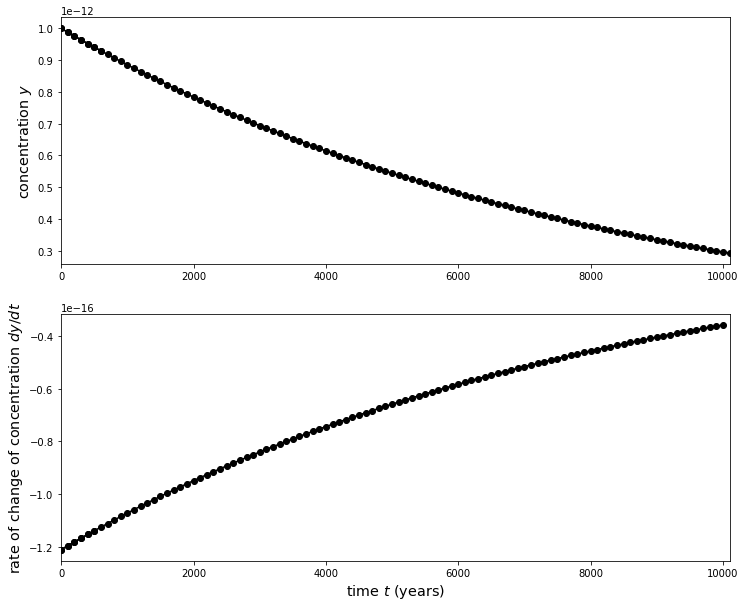

In [78]:
# if we're going to compute lots of time steps, it's helpful to keep a list of the values
# Lets start with the values we've already calculated
# the times:
t = [t0,t100,t200,t300,t400,t500,t600]
# the concentrations
y = [y0,y100,y200,y300,y400,y500,y600]
# the rate of change of concentration
dydt = [dydt0,dydt100,dydt200,dydt300,dydt400,dydt500]

# let's go ahead and plot what we have so far
f,p=plt.subplots(2,figsize=(12,10))

# plot the concentrations 
p[0].plot(t,y,color='black',marker='o')
# plot the concentration change rates
p[1].plot(t[0:-1],dydt,color='black',marker='o')

p[1].set_xlabel('time $t$ (years)',fontsize='x-large');
p[0].set_ylabel('concentration $y$',fontsize='x-large');
p[1].set_ylabel('rate of change of concentration $dy/dt$',fontsize='x-large')
p[0].set_xlim([-10,610])
p[1].set_xlim([-10,610])

# now let's note our current time and concentration
tcurrent = t600
ycurrent = y600

# we're going to compute dy/dt and keep updating y until the current time gets to 10,000 years
while tcurrent <=10000:
    #---------------The instructions above get executed lots of times-------------------
    
    # and compute the current dydt
    dydtcurrent = -0.000121 * ycurrent

    # and extrapolate this dydt for the next 100 years to get a new time step
    ynew = ycurrent + dydtcurrent * 100
    tnew = tcurrent +100
    
    #print('The new time is')
    #print(tnew)
    #print('The new concentration is')
    #print(ynew)
    
    # append these values to our lists
    dydt.append(dydtcurrent)
    t.append(tnew)
    y.append(ynew)
    
    # and now we want to move on to a new time step, so let's move and 
    # set the current time and concentration to the new values
    tcurrent = tnew
    ycurrent = ynew
    
    #---------------The instructions above get executed lots of times-------------------

    
    # now the computer will go back and keep running the code between the marked #------
    # until tcurrent gets to 10000

    
# add to our plots
p[0].set_xlim([-10,tnew+10])
p[1].set_xlim([-10,tnew+10])
# plot the concentrations 
p[0].plot(t,y,color='black',marker='o');
# plot the concentration change rates
p[1].plot(t[0:-1],dydt,color='black',marker='o');
